In [2]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn import preprocessing
from sklearn import ensemble
from sklearn import gaussian_process
from sklearn import linear_model
from sklearn import naive_bayes
from sklearn import neighbors
from sklearn import svm
from sklearn import tree
from sklearn import discriminant_analysis
from sklearn import model_selection
from xgboost.sklearn import XGBClassifier 


from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv(r'data after extraction.csv')

In [4]:
df.head()

,name,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE,status
0,phon_R01_S01_1,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.06545,0.02211,21.033,0.414783,0.815285,0.284654,1
1,phon_R01_S01_2,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.09403,0.01929,19.085,0.458359,0.819521,0.368674,1
2,phon_R01_S01_3,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.08270,0.01309,20.651,0.429895,0.825288,0.332634,1
3,phon_R01_S01_4,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.08771,0.01353,20.644,0.434969,0.819235,0.368975,1
4,phon_R01_S01_5,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.10470,0.01767,19.649,0.417356,0.823484,0.410335,1


In [5]:
df.shape

(951, 17)

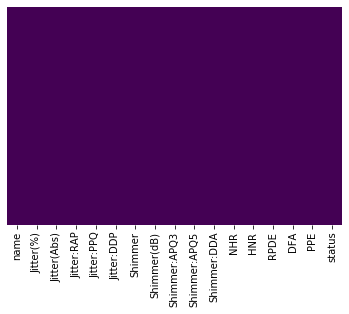

In [7]:
sns.heatmap(df.isna(),yticklabels=False, cbar=False, cmap='viridis')

# Class Frequency

In [8]:
data = df
data = df.drop(['status'], axis=1)
label = df['status']

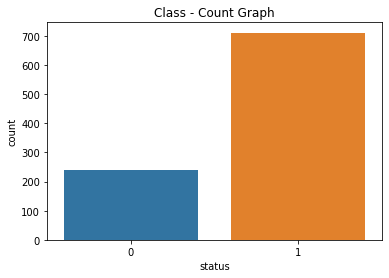

In [9]:
sns.countplot('status', data=df)
plt.xlabel('status')
plt.title('Class - Count Graph')
plt.show()

In [13]:
data.drop(['name', 'PPE'], axis=1, inplace=True)

# Data Visuals

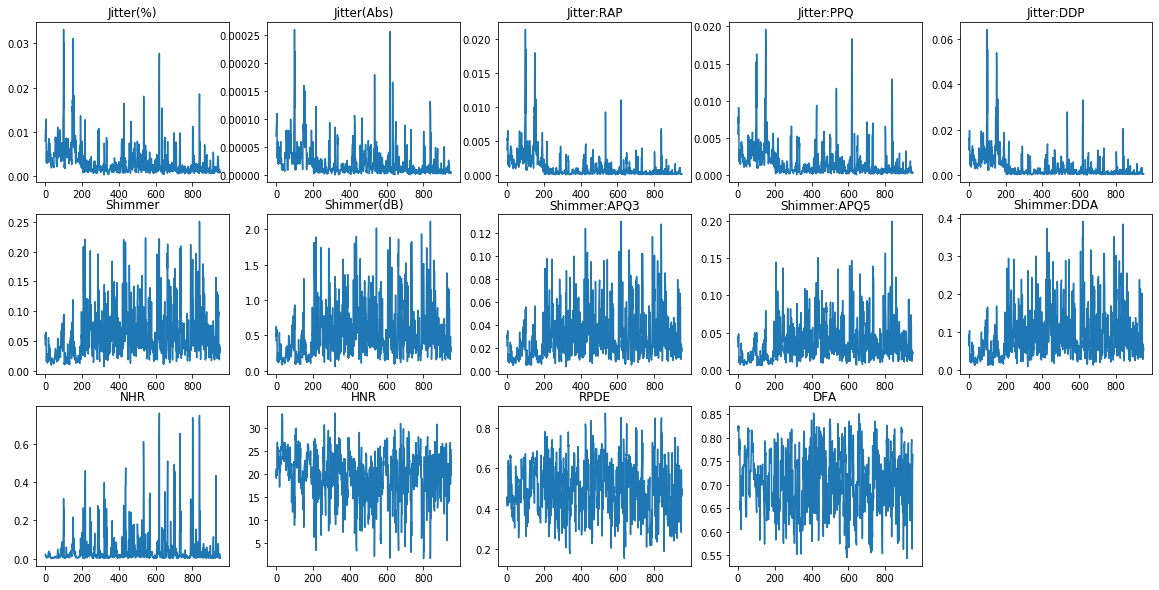

In [14]:
plt.figure(figsize=(20,10))
for j,i in enumerate(data.columns.values):
    plt.subplot(3,5,j+1)
    plt.plot(data[i].values)
    plt.title(f'{i}')

[]

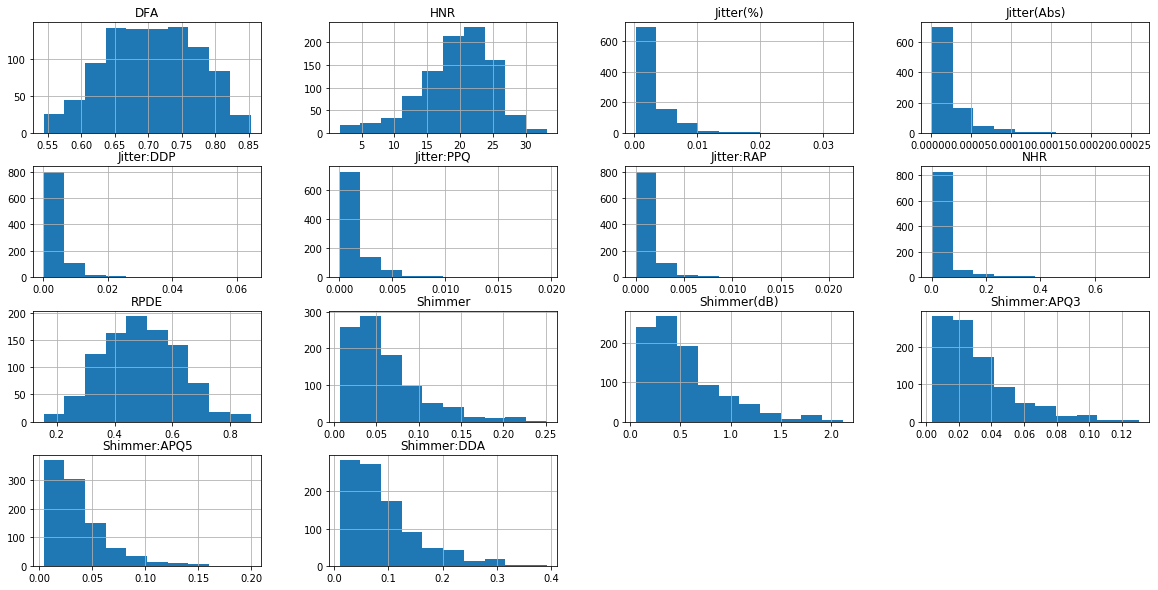

In [15]:
data.hist(figsize=(20,10),)
plt.plot()

[]

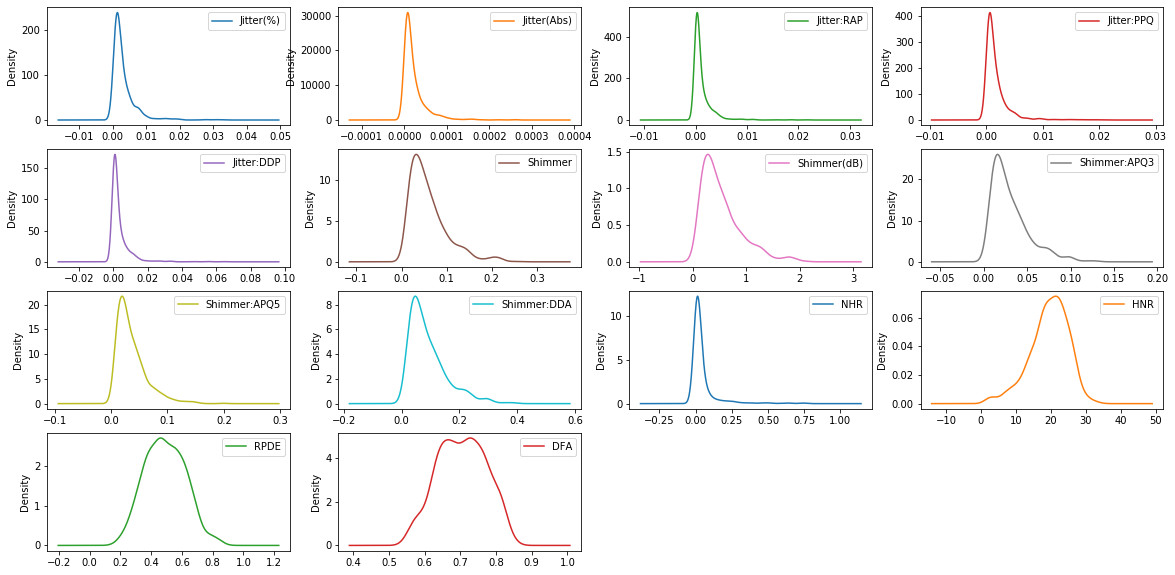

In [16]:
data.plot(kind='kde', subplots=True, figsize=(20,10),
              layout=(-1, 4), sharex=False)
plt.plot()

# Summary

In [21]:
desc = data.describe().transpose()


In [22]:
desc_copy = desc.reset_index(drop=True).drop('count', axis=1)


[]

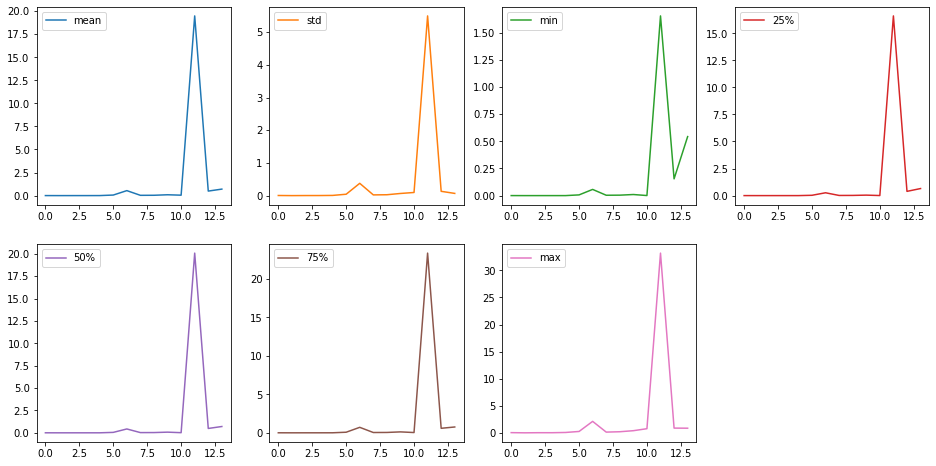

In [23]:
desc_copy.plot(kind='line', subplots=True, figsize=(16,8),
              layout=(-1, 4), sharex=False)
plt.plot()

# Standardisation

In [24]:
# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fit your data on the scaler object
standerdise_data = scaler.fit_transform(data)

In [25]:
standerdise_data = pd.DataFrame(standerdise_data, columns=data.columns)

In [28]:
standerdise_data

,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:DDA,NHR,HNR,RPDE,DFA
0,1.320836,1.702385,1.312240,1.816570,1.310455,-0.379977,-0.303385,-0.399938,-0.192160,-0.400092,-0.247340,0.282675,-0.580892,1.652024
1,1.836098,2.059402,1.802829,2.475958,1.801034,0.038264,0.229104,0.036767,0.331035,0.036920,-0.276855,-0.071937,-0.248779,1.714931
2,2.065726,2.416418,2.210792,2.870662,2.212432,-0.175847,-0.154288,-0.136172,0.082253,-0.136325,-0.341747,0.213136,-0.465716,1.800573
3,1.917308,2.416418,1.993900,2.485245,1.992101,-0.114299,-0.061102,-0.059565,0.137664,-0.059718,-0.337141,0.211862,-0.427045,1.710683
4,2.721005,3.130451,2.784005,3.460395,2.785635,0.107416,0.117281,0.200072,0.446756,0.200074,-0.293811,0.030733,-0.561282,1.773782
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
946,-0.695407,-0.690696,-0.557159,-0.653811,-0.557189,-0.956721,-0.982308,-0.910955,-0.897042,-0.910959,-0.451842,1.334861,-1.578790,-2.086330
947,-0.474181,-0.564669,-0.515847,-0.565583,-0.517598,-0.399701,-0.154288,-0.342597,-0.382139,-0.342751,-0.211660,-0.305494,0.769301,-2.064945
948,-0.661803,-0.658565,-0.541667,-0.616662,-0.539975,-0.711718,-0.737363,-0.668291,-0.649768,-0.668446,-0.431862,0.823695,-0.174158,0.286757
949,-0.616998,-0.609653,-0.510683,-0.565583,-0.508991,-0.575314,-0.609566,-0.579298,-0.486929,-0.579301,-0.353877,0.041109,0.055095,0.666184


In [29]:
standerdise_desc = standerdise_data.describe().transpose()

In [30]:
standerdise_desc_copy = standerdise_desc.reset_index(drop=True).drop('count', axis=1)

In [31]:
standerdise_desc_copy

,mean,std,min,25%,50%,75%,max
0,-3.046984e-17,1.000526,-0.815822,-0.563791,-0.325763,0.161496,8.411291
1,-6.630985e-17,1.000526,-0.772239,-0.581628,-0.375451,0.251113,8.485698
2,2.052337e-16,1.000526,-0.588144,-0.505518,-0.371252,0.121918,10.473332
3,3.696074e-16,1.000526,-0.732751,-0.547008,-0.356622,0.144884,8.336147
4,-2.546158e-16,1.000526,-0.589894,-0.505549,-0.371285,0.122737,10.474817
5,5.370164e-17,1.000526,-1.263511,-0.719916,-0.270664,0.414800,4.545522
6,-1.130069e-16,1.000526,-1.285827,-0.741357,-0.290073,0.458074,4.190822
7,-3.117030e-17,1.000526,-1.247199,-0.734118,-0.273789,0.432645,4.585924
8,1.507732e-16,1.000526,-1.215557,-0.700655,-0.284134,0.411324,6.148379
9,-1.437103e-16,1.000526,-1.247358,-0.734121,-0.273637,0.432571,4.586100


# Statistical Summary Plot on Standardise Data

[]

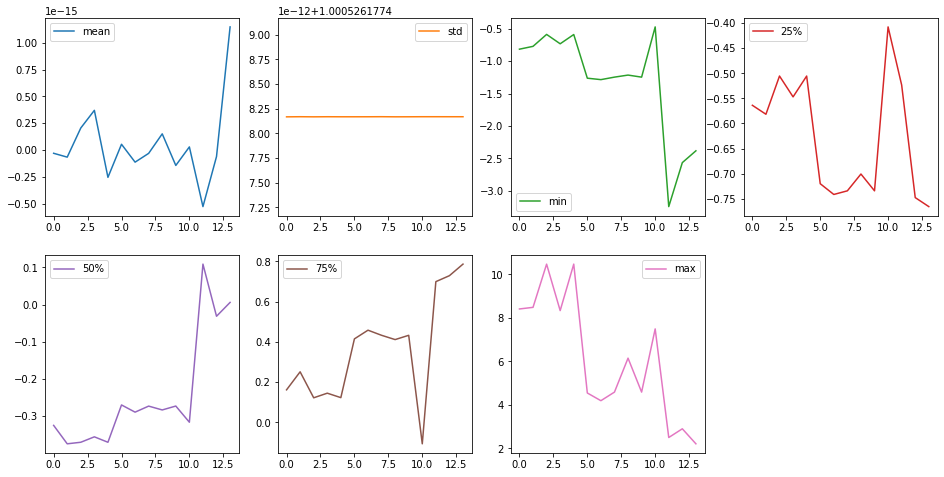

In [32]:
standerdise_desc_copy.plot(kind='line', subplots=True, figsize=(16,8),
              layout=(-1, 4), sharex=False)
plt.plot()

# Preparing inputs and ouputs

In [36]:
X = standerdise_data
y = label

In [37]:
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=0.5)

# Feature Extraction using XGBOOST

In [38]:
clf = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [39]:
clf.fit(train_X,train_y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, monotone_constraints='()',
              n_estimators=100, n_jobs=1, nthread=1, num_parallel_tree=1,
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=0, silent=None, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=1)

In [40]:
clf.score(train_X,train_y)

0.911578947368421

In [41]:
clf.score(test_X,test_y)

0.7752100840336135

# Feature Importances

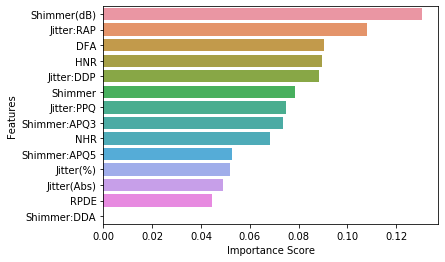

In [42]:
imp_score = pd.DataFrame(clf.feature_importances_, columns=['Importance Score'])
features = pd.DataFrame(data.columns, columns=['Features'])
feature_imp = pd.concat([features,imp_score], axis=1)
feature_imp = feature_imp.sort_values(by='Importance Score', ascending=False)
sns.barplot(x=feature_imp['Importance Score'], y=feature_imp['Features'])
plt.show()

# Top 5 Features

In [43]:
reduced_X = X[feature_imp.Features[:5]]
reduced_X.head()

,Shimmer(dB),Jitter:RAP,DFA,HNR,Jitter:DDP
0,-0.303385,1.312240,1.652024,0.282675,1.310455
1,0.229104,1.802829,1.714931,-0.071937,1.801034
2,-0.154288,2.210792,1.800573,0.213136,2.212432
3,-0.061102,1.993900,1.710683,0.211862,1.992101
4,0.117281,2.784005,1.773782,0.030733,2.785635


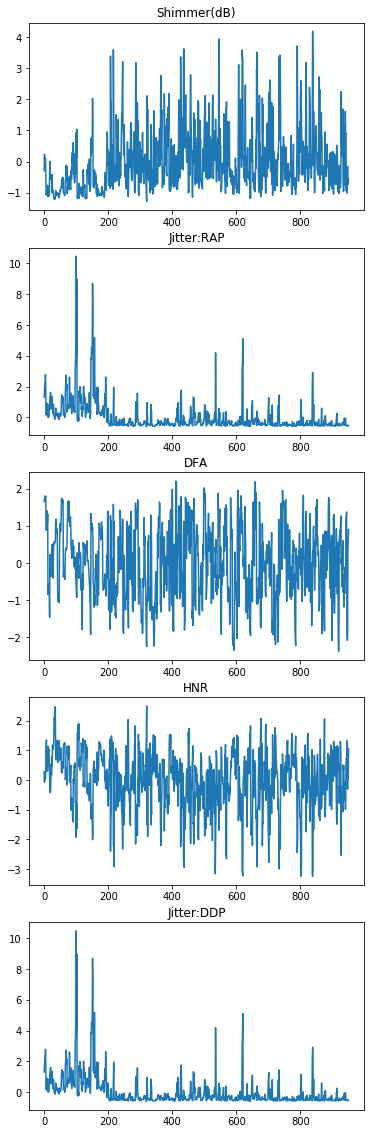

In [44]:
plt.figure(figsize=(6,20))
for j,i in enumerate(reduced_X.columns.values):
    plt.subplot(5,1,j+1)
    plt.plot(reduced_X[i].values)
    plt.title(f'{i}')

# Comparison of Different Classification Models

In [45]:
train_X, test_X, train_y, test_y = train_test_split(reduced_X,y,test_size=0.5)

In [47]:
MLA = [
    #Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    #Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),
    
    #GLM
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),
    
    #Navies Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
    
    #SVM
    svm.SVC(probability=True),
    svm.LinearSVC(),
    
    #Trees    
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    
    #Discriminant Analysis
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),

    
    #xgboost
    XGBClassifier()
    ]

In [48]:
MLA_compare = []

#index through MLA and save performance to table
for alg in MLA:
    
    #score model with cross validation: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate
   # cv_results = model_selection.cross_validate(alg, X_train, y_train)
    alg.fit(train_X, train_y)
    y_pred=alg.predict(test_X)
    score=accuracy_score(test_y, y_pred)
    MLA_compare.append((str(alg).split('(')[0],score))
MLA_compare = sorted(MLA_compare, key=lambda x: x[1], reverse=True)

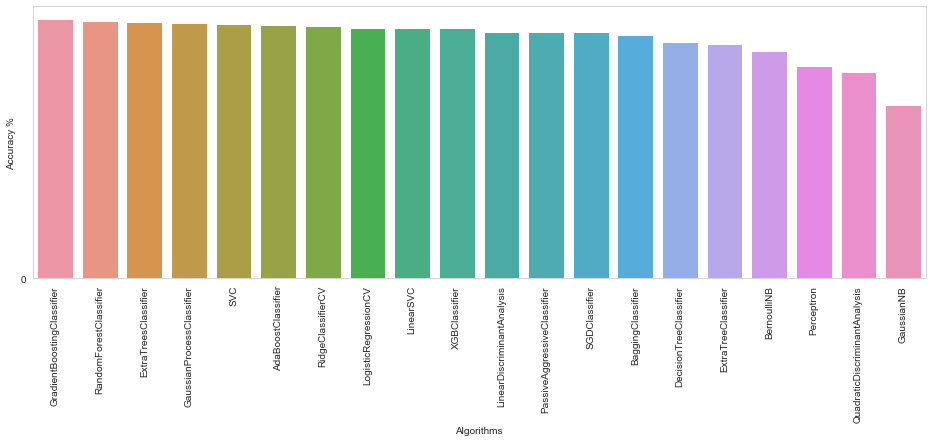

In [49]:
sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.xticks(rotation=90)
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=(lambda x:[i[0] for i in x])(MLA_compare), y=(lambda x:[i[1] for i in x])(MLA_compare))
plt.show()